# Training and Testing an MDRNN on Different Models

This script tests the MDRNN on different models

In [1]:
%matplotlib inline
import random
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from context import *
import empi_mdrnn
import tensorflow as tf
from keras import backend as K

Using TensorFlow backend.



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [2]:
# Model Hyperparameters
mdrnn_units = 32
mdrnn_mixes = 5
mdrnn_layers = 2

pitemp = 1
sigmatemp = 0.01

empi_mdrnn.MODEL_DIR = "./models/"
net = empi_mdrnn.PredictiveMusicMDRNN(mode=empi_mdrnn.NET_MODE_RUN,
                                              dimension=2,
                                              n_hidden_units=mdrnn_units,
                                              n_mixtures=mdrnn_mixes,
                                              layers=mdrnn_layers)
net.pi_temp = pitemp
net.sigma_temp = sigmatemp

Building EMPI Model...
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (1, 1, 2)                 0         
_________________________________________________________________
lstm0 (LSTM)                 (1, 1, 32)                4480      
_________________________________________________________________
lstm1 (LSTM)                 (1, 32)                   8320      
_________________________________________________________________
mdn_outputs (MDN)            (1, 25)                   825       
Total params: 13,625
Trainable params: 13,625
Non-trainable params: 0
_________________________________________________________________


[0.01210075 0.06154765]


,t,x,time
count,1501.000000,1501.000000,1501.000000
mean,0.149714,0.497160,113.053483
std,0.079977,0.208932,64.599954
min,0.007614,0.061548,0.012101
25%,0.095058,0.457723,58.494860
50%,0.134615,0.491738,113.201208
75%,0.239520,0.538748,169.305546
max,0.289170,0.919089,224.720145


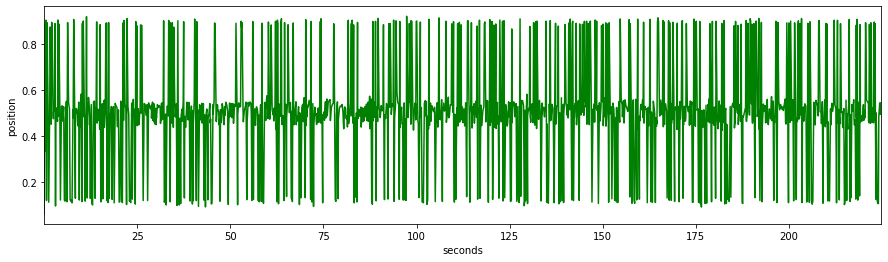

In [3]:
# test untrained model.
net.model.load_weights("../models/musicMDRNN-dim2-layers2-units32-mixtures5-scale10-noise.h5")
net.prepare_model_for_running()
sample = empi_mdrnn.random_sample()
num_steps = 1500
p = net.generate_performance(sample, num_steps)
perf_df = pd.DataFrame({'t':p.T[0], 'x':p.T[1]})
perf_df['time'] = perf_df.t.cumsum()
#plt.plot(perf_df.time, perf_df.x, '.r-')
#plt.show()
display(perf_df.describe())

# Generate slightly nicer plot.
ax = perf_df.plot(x='time', y='x', kind="line", color='g', figsize=(15,4), legend=False)
ax.set_xlabel("seconds")
ax.set_ylabel("position")
ax.get_figure().savefig('../images/untrained_data_output.pdf', dpi=300, bbox_inches="tight")
ax.get_figure().savefig('../images/untrained_data_output.png', dpi=300, bbox_inches="tight")

In [ ]:
# Load and test synthetic model.
net.model.load_weights("../models/musicMDRNN-dim2-layers2-units32-mixtures5-scale10-synth.h5")
net.prepare_model_for_running()
sample = empi_mdrnn.random_sample()
num_steps = 1500
p = net.generate_performance(sample, num_steps)
perf_df = pd.DataFrame({'t':p.T[0], 'x':p.T[1]})
perf_df['time'] = perf_df.t.cumsum()
display(perf_df.describe())

# Generate slightly nicer plot.
ax = perf_df.plot(x='time', y='x', kind="line", color='r', figsize=(15,4), legend=False)
ax.set_xlabel("seconds")
ax.set_ylabel("position")
ax.get_figure().savefig('../images/synth_data_output.pdf', dpi=300, bbox_inches="tight")
ax.get_figure().savefig('../images/synth_data_output.png', dpi=300, bbox_inches="tight")

In [ ]:
# Load and test synthetic model.
net.model.load_weights("../models/musicMDRNN-dim2-layers2-units32-mixtures5-scale10-human.h5")
net.prepare_model_for_running()
sample = empi_mdrnn.random_sample()
num_steps = 1500
p = net.generate_performance(sample, num_steps)
perf_df = pd.DataFrame({'t':p.T[0], 'x':p.T[1]})
perf_df['time'] = perf_df.t.cumsum()
#plt.plot(perf_df.time, perf_df.x, '.r-')
#plt.show()
display(perf_df.describe())

# Generate slightly nicer plot.
ax = perf_df.plot(x='time', y='x', kind="line", color='b', figsize=(15,4), legend=False)
ax.set_xlabel("seconds")
ax.set_ylabel("position")
ax.get_figure().savefig('../images/human_data_output.pdf', dpi=300, bbox_inches="tight")
ax.get_figure().savefig('../images/human_data_output.png', dpi=300, bbox_inches="tight")

In [ ]:
# ## Investigate Output
# window = 100
# for n in [1000,2000,3000,4000,5000,6000]:
#     print("Window:", str(n),'to',str(n+window))
#     plt.plot(perf_df[n:n+window].time, perf_df[n:n+window].x, '.r-')
#     plt.show()